In [1]:
import numpy as np
from sklearn import *

In [2]:
m  = 60000;
low = 1
high = 40

In [3]:
d_vals = np.arange(low, high, 1)
exp_var = []
print(d_vals)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


In [4]:
def gen_x(d, m):
    X = np.random.normal(0, 1, (d,2*m))
    return X

In [5]:
def gen_y(X,d,m,w_b):
    y = np.zeros((2*m ,))
    for i in range(2*m):
        samp = np.random.normal(w_b @ X[:, i], 1)
        y[i] = samp
    return y

In [8]:
def find_exp_var(d,m):
    X = gen_x(d, m)
    w_b = np.random.randn(d,) #the bayes optimal w
    y = gen_y(X, d, m, w_b)
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X.T, y, test_size = 0.5, shuffle = True)
    reg = linear_model.LinearRegression().fit(X_train, y_train)
    score = reg.score(X_test,y_test)
    coefficients = reg.coef_
    y_predict = reg.predict(X_test)
    exvar = metrics.explained_variance_score(y_test,y_predict)
    return exvar


In [9]:
find_exp_var(5, m)
find_exp_var(6, m)

0.6884503523217769

In [10]:
d_vals.shape[0]

39

In [11]:
for i in range(d_vals.shape[0]):
    exp_var.append(find_exp_var(d_vals[i], m))
    print("Iteration : "  + str(i) + " exp_var : ", find_exp_var(d_vals[i], m))

Iteration : 0 exp_var :  0.08517419443223584
Iteration : 1 exp_var :  0.8806423417974096
Iteration : 2 exp_var :  0.8616698302265177
Iteration : 3 exp_var :  0.7274778412268993
Iteration : 4 exp_var :  0.7864834325190502
Iteration : 5 exp_var :  0.906135836927793
Iteration : 6 exp_var :  0.7750187354729472
Iteration : 7 exp_var :  0.9248564947060786
Iteration : 8 exp_var :  0.8674730957303187
Iteration : 9 exp_var :  0.8420808355145644
Iteration : 10 exp_var :  0.9337359642109867
Iteration : 11 exp_var :  0.9026128928796625
Iteration : 12 exp_var :  0.8788169109933176
Iteration : 13 exp_var :  0.9566478061643445
Iteration : 14 exp_var :  0.9271264756410506
Iteration : 15 exp_var :  0.9640575605309976
Iteration : 16 exp_var :  0.966341782837654
Iteration : 17 exp_var :  0.9362980159240462
Iteration : 18 exp_var :  0.9674437703175207
Iteration : 19 exp_var :  0.9656167519661081
Iteration : 20 exp_var :  0.9534622595016272
Iteration : 21 exp_var :  0.9418476523499071
Iteration : 22 exp_va

In [12]:
print(exp_var)

[0.48927956949277174, 0.48796648747677895, 0.8518424183925962, 0.9023424337882986, 0.8707176856889991, 0.5587203462324425, 0.8610804305303413, 0.8014771332464156, 0.9214012463062128, 0.8726922040806107, 0.9149129954353201, 0.9263389158112039, 0.9489037769733552, 0.9627004546060594, 0.9557829190600977, 0.9309167024854985, 0.9464539366287056, 0.9588308422052885, 0.9526165316673141, 0.9492221207436127, 0.9412393213309094, 0.9634103611744418, 0.9559668755999207, 0.9668459617064578, 0.9602287460928329, 0.9776762018724845, 0.9707642513426067, 0.9657291899999925, 0.9647769438153876, 0.9701758121131039, 0.9740679194487423, 0.9762195658024313, 0.9803113482939493, 0.9667709158904293, 0.9792828866250439, 0.9711865002834322, 0.9790579983062043, 0.9773909017850467, 0.976356472212989]


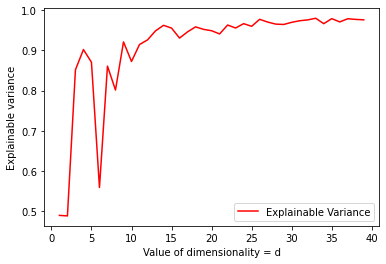

In [13]:
import matplotlib.pyplot as plt
plt.plot(d_vals, exp_var, color= 'r', label = 'Explainable Variance')
plt.xlabel("Value of dimensionality = d")
plt.ylabel("Explainable variance")
plt.legend()